In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [6]:
data = pd.read_excel('data_mag_rad.xls')
data.describe()

,Team,point,y,x,hight,Igamma,data
count,11.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,6.000000,15.515432,44.785019,34.012791,382.453704,11.498148,48912.811728
std,3.316625,8.948930,0.006425,0.008246,68.078499,3.422788,176.810576
min,1.000000,1.000000,44.770556,33.993889,251.000000,3.000000,48283.000000
25%,NaN,8.000000,44.780208,34.006875,324.750000,9.500000,48807.000000
50%,NaN,15.000000,44.785000,34.012500,381.500000,12.000000,48827.500000
75%,NaN,23.000000,44.790833,34.018125,437.500000,14.000000,49007.250000
max,11.000000,36.000000,44.796944,34.032500,550.000000,19.000000,49850.000000


# Task 3

In [30]:
step = 7 
def normalize(list_data):
    minimum = min(list_data)
    maximum = max(list_data)
    return map(lambda i: float(maximum-i)/(maximum-minimum),list_data)

def sin_normalize(list_data):
    return map(lambda i: np.sin(i), list_data)

def move_window(list_data, current_possition, step):
    return list_data[current_possition:current_possition+step]

def define_correlation(list_data1,list_data2):
    list_coeff = []
    for i in range(len(list_data1)-(len(list_data1)%step)):
        temp_1 = move_window(list_data1,i,step)
        temp_2 = move_window(list_data2,i,step)
        list_coeff.append(np.corrcoef(temp_1,temp_2)[0][1])
    plt.plot(range(len(list_data1)-(len(list_data1)%step)), list_coeff, 'r-',label = 'correlation')
    plt.plot(range(len(list_data1)), list_data1, 'b-',label = 'gamma')
    plt.plot(range(len(list_data2)), list_data2, 'g-',label = 'rad')
    plt.plot(range(len(list_data2)), [0 for x in list_data1], 'r--',label = 'zero')
    plt.axis([0,335,-1.5,1.5])
    plt.legend(loc='best')
    
def avarage(data1, data2):
    list_of_avarage = []
    for i in range(len(data1)-len(data1)%step-1):
        temp_1 = move_window(data1,i,step)
        temp_2 = move_window(data2, i, step)
        list_of_avarage.append(temp_1[step/2]*temp_2[step/2])
    plt.plot(range(step/2, (len(data1)-len(data1)%step-1)+step/2), list_of_avarage, 'w-',label = 'avarage')
    plt.axis([0,335,-1,1])
    plt.legend(loc='best')



In [31]:
plt.figure(figsize=(20,7))
data1 = normalize(data.Igamma)
data2 = normalize(data.data)
define_correlation(data1,data2)
avarage(data1, data2)

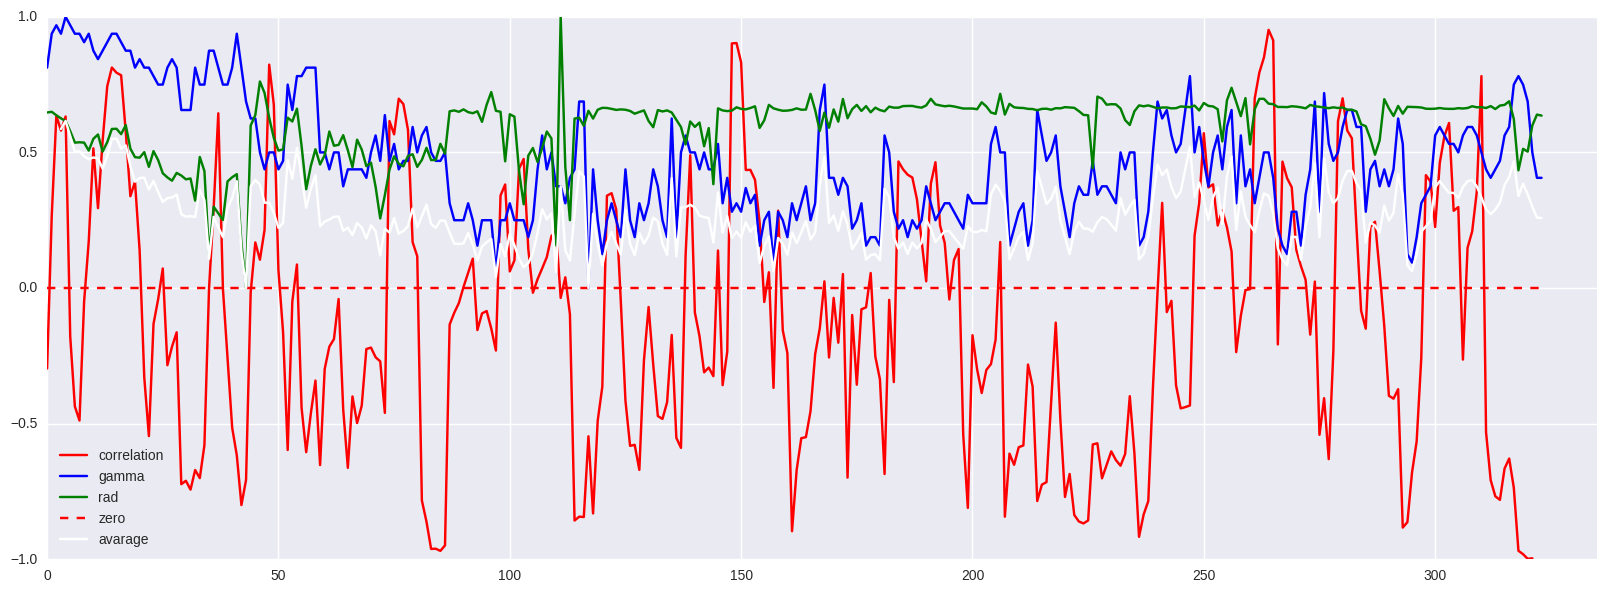

In [32]:
plt.show()

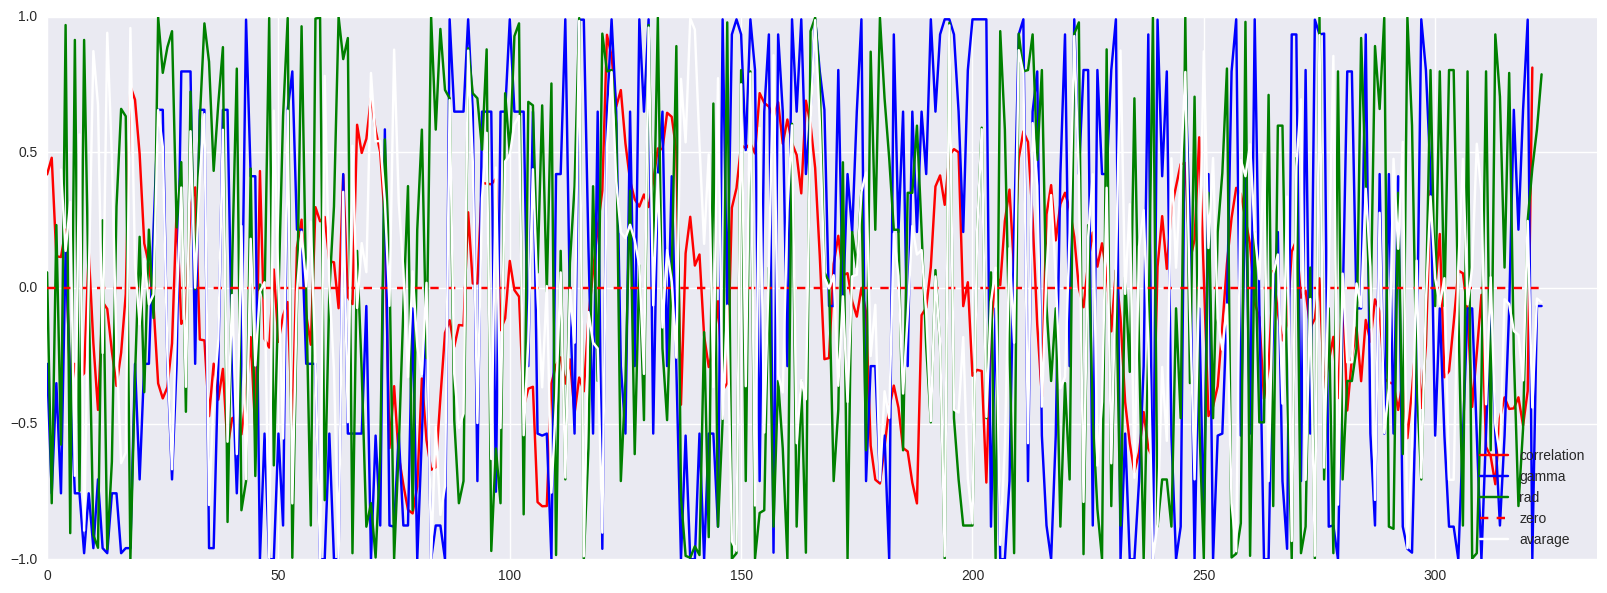

In [33]:
plt.figure(figsize=(20,7))
data1 = sin_normalize(data.Igamma)
data2 = sin_normalize(data.data)
define_correlation(data1,data2)
avarage(data1, data2)
plt.show()

# Task 1 

In [180]:
gamma = data.Igamma
rad = data.data

In [392]:
step = 5

def part(arr,num,step):
    '''
    return interval number depend on step.
    num: part of interva.
    arr: list with your data.
    step: number of interval. 
    '''
    min_num = arr.min()
    max_num = arr.max()
    dev = float(max_num - min_num) / step
    if num > step:
        return False
    return min_num + float(dev) * num

def interval_data(interval,data):
    '''
    interval: list with 2 numbers.
    interval[0] interval start, interval[1] interval end.
    data: list, with data.
    '''
    start = interval[0][0]
    end = interval[0][1]
    temp = []
    for i in data:
        if all([i >= start, i <= end]):
            temp.append(i)
    return temp

1
215
91
13
4


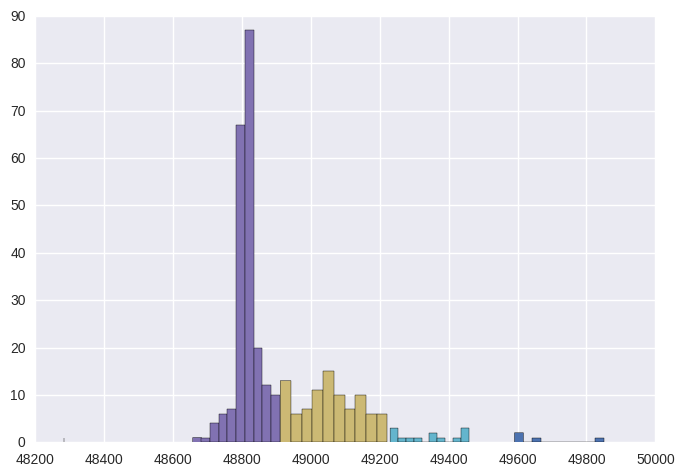

In [402]:
# for rad
#get interval number
interval = map(lambda x: part(rad,x,step),range(step+1))
#get interval
result = map(lambda x: interval_data([interval[x:x+2]],rad),range(len(interval)-1))

for i in result:
    print len(i)
    plt.hist(i)
plt.show()

36
39
118
103
28


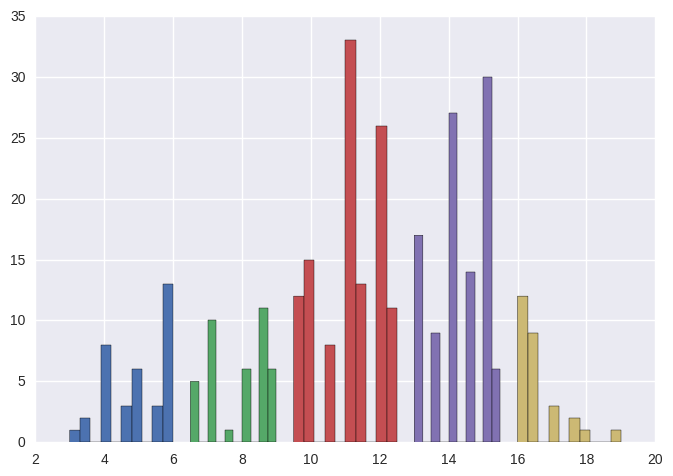

In [404]:
# for gamma
#get interval number
interval = map(lambda x: part(gamma,x,step),range(step+1))
#get interval
result = map(lambda x: interval_data([interval[x:x+2]],gamma),range(len(interval)-1))

for i in result:
    print len(i)
    plt.hist(i)
plt.show()

# Task 2